In [18]:
import pandas as pd
import numpy as np
import os
import random

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
chembl_data = pd.read_csv('chembl_target_3778.csv',delimiter=';')  # 예시 파일 이름
chembl_data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL210682,NaN,NaN,316.70,0.0,3.38,17,O=C(Nc1nc2cc(Cl)ccc2[nH]1)c1cccc([N+](=O)[O-])c1,IC50,'=',...,SINGLE PROTEIN,CHEMBL1147720,1,Scientific Literature,Bioorg Med Chem Lett,2006.0,NaN,NaN,NaN,NaN
1,CHEMBL3634503,NaN,NaN,408.39,0.0,1.90,33,Cn1cc(NC(=O)c2ccc3cnc(N[C@@H]4CCCNC4)nn23)c(C(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3632465,1,Scientific Literature,Bioorg Med Chem Lett,2015.0,NaN,NaN,NaN,NaN
2,CHEMBL3634512,NaN,NaN,388.86,0.0,2.05,42,Cn1cc(NC(=O)c2cnn3ccc(N[C@@H]4CCCC[C@@H]4N)nc2...,IC50,'<',...,SINGLE PROTEIN,CHEMBL3632465,1,Scientific Literature,Bioorg Med Chem Lett,2015.0,NaN,NaN,NaN,NaN
3,CHEMBL3634503,NaN,NaN,408.39,0.0,1.90,33,Cn1cc(NC(=O)c2ccc3cnc(N[C@@H]4CCCNC4)nn23)c(C(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3632465,1,Scientific Literature,Bioorg Med Chem Lett,2015.0,NaN,NaN,NaN,NaN
4,CHEMBL3634380,NaN,NaN,439.47,0.0,3.38,25,Cn1cc(NC(=O)c2csc3ncc(N[C@@H]4CCCC[C@@H]4N)nc2...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3632465,1,Scientific Literature,Bioorg Med Chem Lett,2015.0,NaN,NaN,NaN,NaN


In [4]:
null_percentage = chembl_data.isnull().mean()
columns_to_drop = null_percentage[null_percentage > 0.5].index
chembl_data_cleaned = chembl_data.drop(columns=columns_to_drop)

In [5]:
chembl_data_cleaned.head()

,Molecule ChEMBL ID,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,...,BAO Label,Assay Organism,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Year
0,CHEMBL210682,316.70,0.0,3.38,17,O=C(Nc1nc2cc(Cl)ccc2[nH]1)c1cccc([N+](=O)[O-])c1,IC50,'=',6000.0,nM,...,single protein format,Homo sapiens,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL1147720,1,Scientific Literature,2006.0
1,CHEMBL3634503,408.39,0.0,1.90,33,Cn1cc(NC(=O)c2ccc3cnc(N[C@@H]4CCCNC4)nn23)c(C(...,IC50,'=',2.0,nM,...,single protein format,Homo sapiens,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL3632465,1,Scientific Literature,2015.0
2,CHEMBL3634512,388.86,0.0,2.05,42,Cn1cc(NC(=O)c2cnn3ccc(N[C@@H]4CCCC[C@@H]4N)nc2...,IC50,'<',0.5,nM,...,single protein format,Homo sapiens,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL3632465,1,Scientific Literature,2015.0
3,CHEMBL3634503,408.39,0.0,1.90,33,Cn1cc(NC(=O)c2ccc3cnc(N[C@@H]4CCCNC4)nn23)c(C(...,IC50,'=',34.0,nM,...,single protein format,Homo sapiens,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL3632465,1,Scientific Literature,2015.0
4,CHEMBL3634380,439.47,0.0,3.38,25,Cn1cc(NC(=O)c2csc3ncc(N[C@@H]4CCCC[C@@H]4N)nc2...,IC50,'=',1.0,nM,...,single protein format,Homo sapiens,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL3632465,1,Scientific Literature,2015.0


In [6]:
chembl_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     2993 non-null   object 
 1   Molecular Weight       2993 non-null   float64
 2   #RO5 Violations        2988 non-null   float64
 3   AlogP                  2988 non-null   float64
 4   Compound Key           2993 non-null   object 
 5   Smiles                 2993 non-null   object 
 6   Standard Type          2993 non-null   object 
 7   Standard Relation      2959 non-null   object 
 8   Standard Value         2962 non-null   float64
 9   Standard Units         2962 non-null   object 
 10  pChEMBL Value          2409 non-null   float64
 11  Comment                1638 non-null   object 
 12  Uo Units               2962 non-null   object 
 13  Ligand Efficiency BEI  2409 non-null   float64
 14  Ligand Efficiency LE   2409 non-null   float64
 15  Liga

In [7]:
chembl_data_cleaned.iloc[0]

Molecule ChEMBL ID                                           CHEMBL210682
Molecular Weight                                                    316.7
#RO5 Violations                                                       0.0
AlogP                                                                3.38
Compound Key                                                           17
Smiles                   O=C(Nc1nc2cc(Cl)ccc2[nH]1)c1cccc([N+](=O)[O-])c1
Standard Type                                                        IC50
Standard Relation                                                     '='
Standard Value                                                     6000.0
Standard Units                                                         nM
pChEMBL Value                                                        5.22
Comment                                                               NaN
Uo Units                                                       UO_0000065
Ligand Efficiency BEI                 

In [8]:
chembl_data_cleaned = chembl_data_cleaned.loc[:, (chembl_data_cleaned.columns != 'Comment')]

In [12]:
chembl_data_cleaned_drop = chembl_data_cleaned.dropna()

In [13]:
chembl_data_cleaned_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 2991
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     2321 non-null   object 
 1   Molecular Weight       2321 non-null   float64
 2   #RO5 Violations        2321 non-null   float64
 3   AlogP                  2321 non-null   float64
 4   Compound Key           2321 non-null   object 
 5   Smiles                 2321 non-null   object 
 6   Standard Type          2321 non-null   object 
 7   Standard Relation      2321 non-null   object 
 8   Standard Value         2321 non-null   float64
 9   Standard Units         2321 non-null   object 
 10  pChEMBL Value          2321 non-null   float64
 11  Uo Units               2321 non-null   object 
 12  Ligand Efficiency BEI  2321 non-null   float64
 13  Ligand Efficiency LE   2321 non-null   float64
 14  Ligand Efficiency LLE  2321 non-null   float64
 15  Ligand Ef

In [14]:
chembl_data_float_columns = chembl_data_cleaned_drop.select_dtypes(include=['float64'])

In [15]:
chembl_data_float_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 2991
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecular Weight       2321 non-null   float64
 1   #RO5 Violations        2321 non-null   float64
 2   AlogP                  2321 non-null   float64
 3   Standard Value         2321 non-null   float64
 4   pChEMBL Value          2321 non-null   float64
 5   Ligand Efficiency BEI  2321 non-null   float64
 6   Ligand Efficiency LE   2321 non-null   float64
 7   Ligand Efficiency LLE  2321 non-null   float64
 8   Ligand Efficiency SEI  2321 non-null   float64
 9   Document Year          2321 non-null   float64
dtypes: float64(10)
memory usage: 199.5 KB


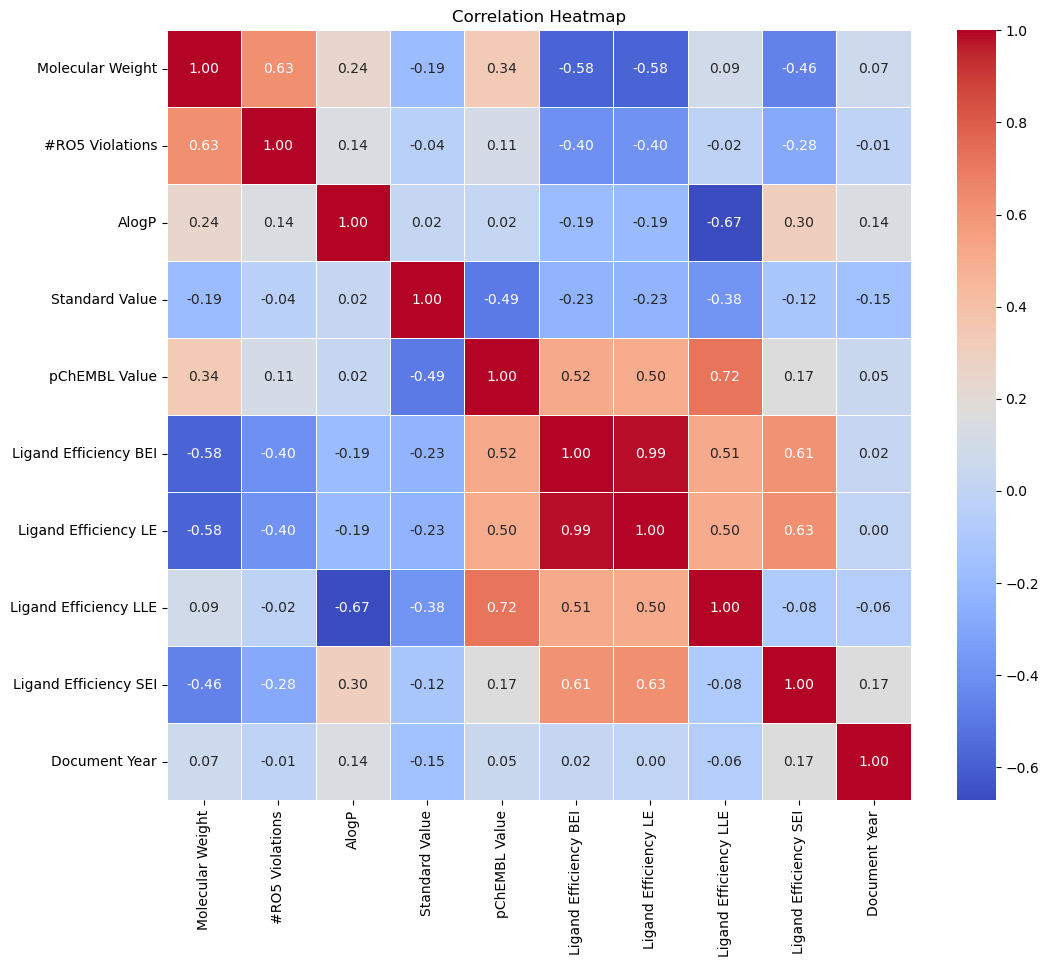

In [19]:
# 상관관계 계산
correlation_matrix = chembl_data_float_columns.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()